In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import torch
import matplotlib.pyplot as plt
import utils

from neural_style_net import NeuralStyleNet
from solver import Solver

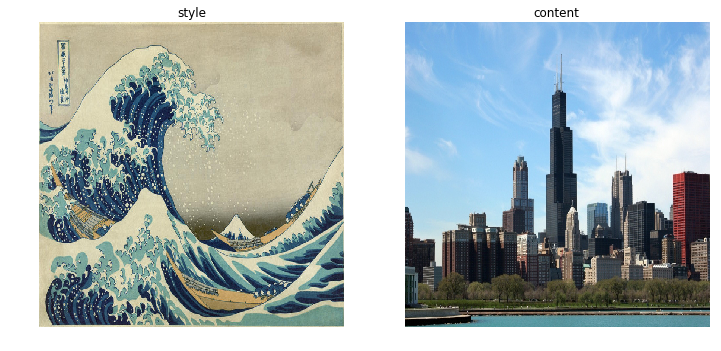

In [3]:
content_image = utils.load_image('images/content/chicago.jpg')
style_image = utils.load_image('images/style/wave.jpg')

_, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
im_size = (1024, 1024)
ax1.imshow(style_image.resize(im_size))
ax2.imshow(content_image.resize(im_size))
ax1.set_title('style')
ax2.set_title('content')
ax1.axis('off')
ax2.axis('off');

In [4]:
USE_GPU = torch.cuda.is_available()
print(USE_GPU)

False


In [5]:
content_var = utils.load_variable(content_image, gpu=USE_GPU)
style_var = utils.load_variable(style_image, gpu=USE_GPU)

In [6]:
features_extractor = utils.load_features_extractor('vgg16')

In [7]:
model = NeuralStyleNet(features_extractor)
if USE_GPU:
    model.cuda()

content_weight, style_weight = 1, 1000
_solver = Solver(model, content_var, style_var, content_weight=content_weight,
                 style_weight=style_weight, num_iters=300, gpu=USE_GPU)
styled_image = _solver.train()

it: 0, content: 0.0, style: 699.5862426757812
it: 50, content: 4.169350624084473, style: 5.235929489135742
it: 100, content: 3.6480298042297363, style: 1.0332821607589722
it: 150, content: 3.2491767406463623, style: 0.6580907106399536
it: 200, content: 3.0495831966400146, style: 0.5142093896865845
it: 250, content: 2.9334709644317627, style: 0.4417276382446289
it: 300, content: 2.8653571605682373, style: 0.4021257162094116


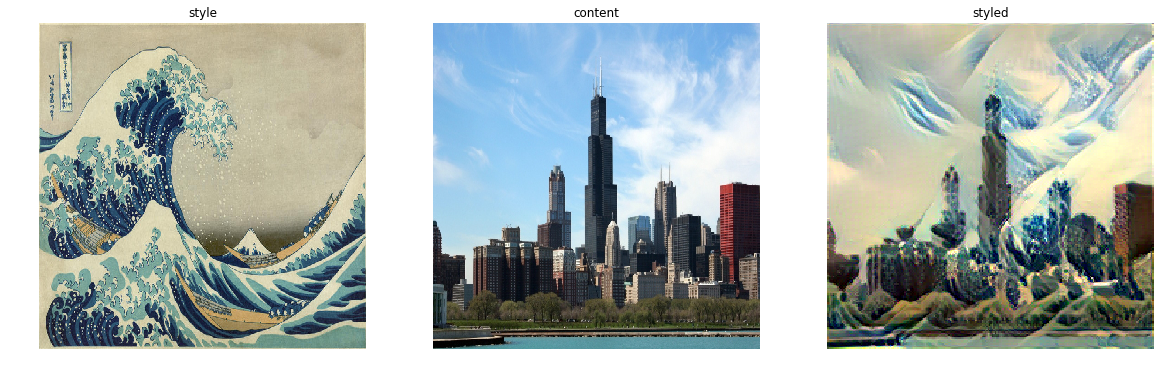

In [8]:
_, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20, 6))
im_size = (1024, 1024)
ax1.imshow(style_image.resize(im_size))
ax2.imshow(content_image.resize(im_size))
ax3.imshow(styled_image.resize(im_size))
ax1.set_title('style')
ax2.set_title('content')
ax3.set_title('styled')
ax1.axis('off')
ax2.axis('off')
ax3.axis('off');